# Fake News Classifier using Deep Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####  **Ojective**:    Predict the news is fake from the given dataset.

#### **Attributes**:  id, title, author, text ,label

#### **Ouput**:      label --> 1 - fake news, 0 - genuine news

#### **Algorithm**: LSTM, Deep learning


## Steps involved
#### 1.Data Preprocessing
#### 2.Exploratory Data Analysis
#### 3.Embedding
#### 4.Split the data
#### 5.Train the model
#### 6.Visualize the results

## Data Preprocessing

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Machine learning/NLP/Fake_news_NLP_train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
print(df.text[5])

In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wor

In [6]:
df.drop(columns = ['id','text','author'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [8]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 474.5+ KB


In [10]:
X = df['title']
y = df['label']

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
corpus = []
for i in range(0,len(X)):
  review = re.sub('[^a-zA-Z]', ' ', X[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(stopwords)]
  review = " ".join(review)
  corpus.append(review)

In [13]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [14]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

## Exploratory Data Analysis

In [15]:
df['cleaned'] = corpus[:]

In [16]:
print(df.shape)
print(len(corpus))


(20242, 4)
20242


Visualize the most frequent word for fake news

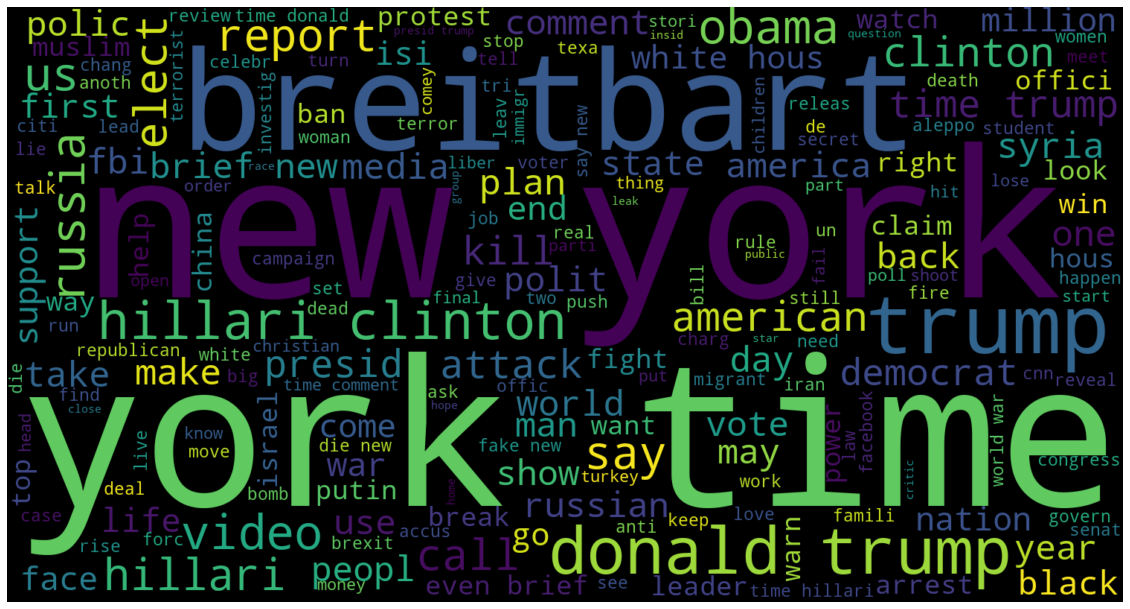

In [17]:
from wordcloud import WordCloud
new_df = df.copy()
new_df = df[df['label'] == 1]
vocab_1 = " ".join(x for x in df['cleaned'])
wordcloud = WordCloud(width = 1500, height = 800).generate(vocab_1)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Visualize the most frequent word for genuine news

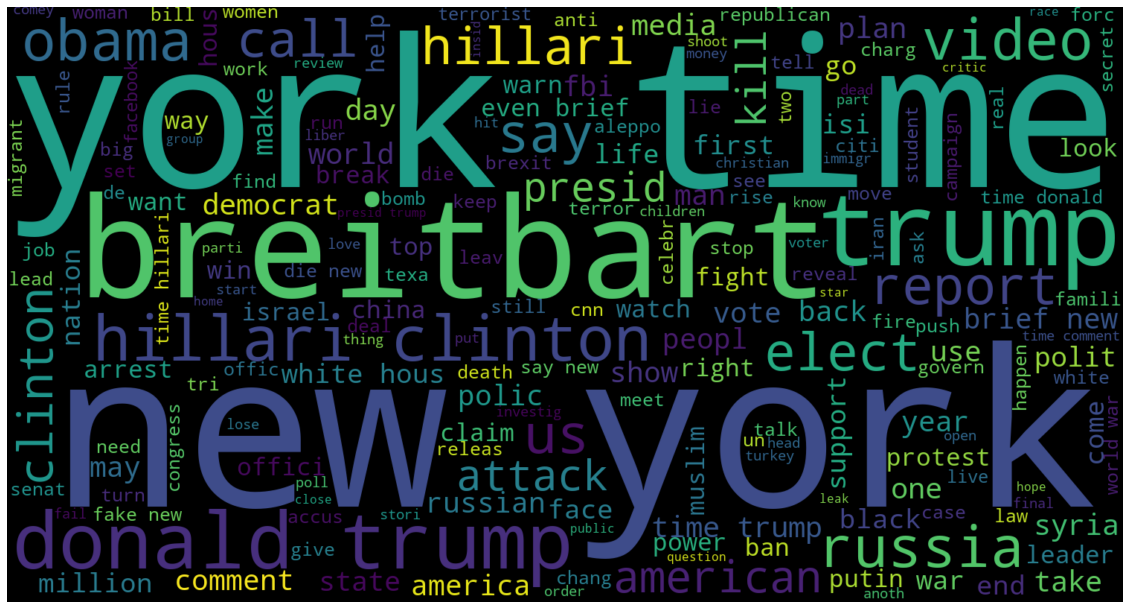

In [18]:
from wordcloud import WordCloud
new_df = df.copy()
new_df = df[df['label'] == 0]
vocab_1 = " ".join(x for x in df['cleaned'])
wordcloud = WordCloud(width = 1500, height = 800).generate(vocab_1)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Create Embeddings

In [19]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

14881

In [20]:
one_hot_rep = [one_hot(words, vocab_size) for words in corpus]
one_hot_rep[0]

[4360, 9140, 9438, 4991, 11771, 13438, 6720, 13743, 5639, 6465]

In [21]:
pad = pad_sequences(one_hot_rep, padding = 'post', maxlen = 20, truncating = 'post')
pad[0]

array([ 4360,  9140,  9438,  4991, 11771, 13438,  6720, 13743,  5639,
        6465,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

## Split the data

In [22]:
print(pad.shape)
print(y.shape)

(20242, 20)
(20242,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(pad, y, test_size = 0.2, random_state = 42, stratify = y)

## Model training

In [24]:
from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.models import Sequential
embedding_vector_features = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, trainable = False))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1488100   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,568,601
Trainable params: 80,501
Non-trainable params: 1,488,100
_________________________________________________________________


In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16193, 20)
(16193,)
(4049, 20)
(4049,)


In [26]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 256)

Epoch 1/10
64/64 [==============================] - 7s 23ms/step - loss: 0.5491 - accuracy: 0.6933 - val_loss: 0.3680 - val_accuracy: 0.8355
Epoch 2/10
64/64 [==============================] - 1s 14ms/step - loss: 0.3390 - accuracy: 0.8552 - val_loss: 0.3051 - val_accuracy: 0.8721
Epoch 3/10
64/64 [==============================] - 1s 15ms/step - loss: 0.2975 - accuracy: 0.8809 - val_loss: 0.2894 - val_accuracy: 0.8792
Epoch 4/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2845 - accuracy: 0.8904 - val_loss: 0.2717 - val_accuracy: 0.8940
Epoch 5/10
64/64 [==============================] - 1s 15ms/step - loss: 0.2689 - accuracy: 0.8953 - val_loss: 0.2609 - val_accuracy: 0.8968
Epoch 6/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2599 - accuracy: 0.8992 - val_loss: 0.2526 - val_accuracy: 0.9002
Epoch 7/10
64/64 [==============================] - 1s 15ms/step - loss: 0.2647 - accuracy: 0.8977 - val_loss: 0.2496 - val_accuracy: 0.9015
Epoch 8/10
64

## Visualize the results

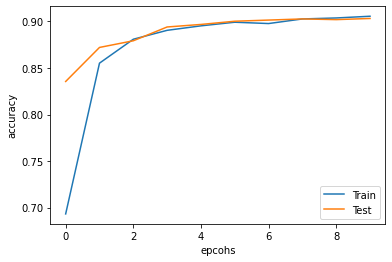

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epcohs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])

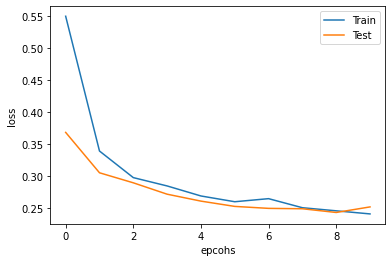

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epcohs')
plt.ylabel('loss')
plt.legend(['Train','Test'])